Librairies

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

Exploratory Data Analysis

Use pandas to load the dataset and examine the first few rows.

In [51]:
#Load Dataset
df = pd.read_csv('data.csv', header= 0, index_col= 0)
print(df.head())
print(df.describe())
print(df.info())



         diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M        17.99         10.38          122.80     1001.0   
842517           M        20.57         17.77          132.90     1326.0   
84300903         M        19.69         21.25          130.00     1203.0   
84348301         M        11.42         20.38           77.58      386.1   
84358402         M        20.29         14.34          135.10     1297.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302            0.11840           0.27760          0.3001   
842517            0.08474           0.07864          0.0869   
84300903          0.10960           0.15990          0.1974   
84348301          0.14250           0.28390          0.2414   
84358402          0.10030           0.13280          0.1980   

          concave points_

Check and handle the missing values.

In [52]:
#Missing values on whole 'Unnamed: 32' column
df.drop(labels= ['Unnamed: 32'], axis= 1, inplace= True)

Drop any unnecessary column

In [53]:
keep_cols = [
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean'
]

df_pruned = df[keep_cols].copy()

Create a Countplot to display diagnosis from magma

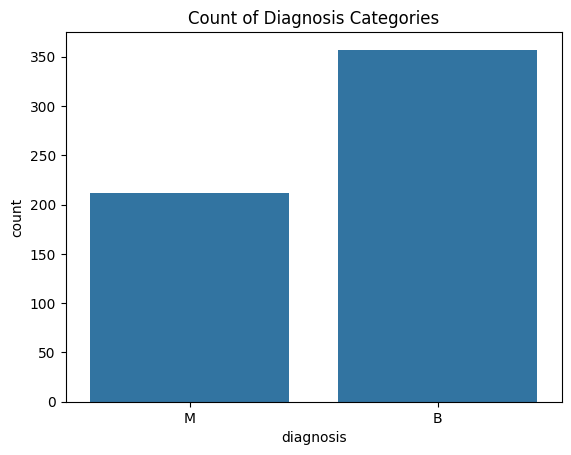

In [54]:
sns.countplot(data=df_pruned, x='diagnosis')
plt.title('Count of Diagnosis Categories')
plt.show()


Data Preprocessing, Building Models and Evaluation :

Counts of unique rows in the ‘diagnosis’ column

In [55]:
print(df_pruned['diagnosis'].value_counts())
print(df_pruned['diagnosis'].value_counts()/df_pruned.shape[0]*100)
#Imbalandce is within acceptable parameters

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
B    62.741652
M    37.258348
Name: count, dtype: float64


map categorical values to numerical values

In [56]:
#Only categorical value is diagnosis
df_pruned['diagnosis'] = df_pruned['diagnosis'].map({'M': 1, 'B': 0})


Other EDA tasks

Normalize distributions

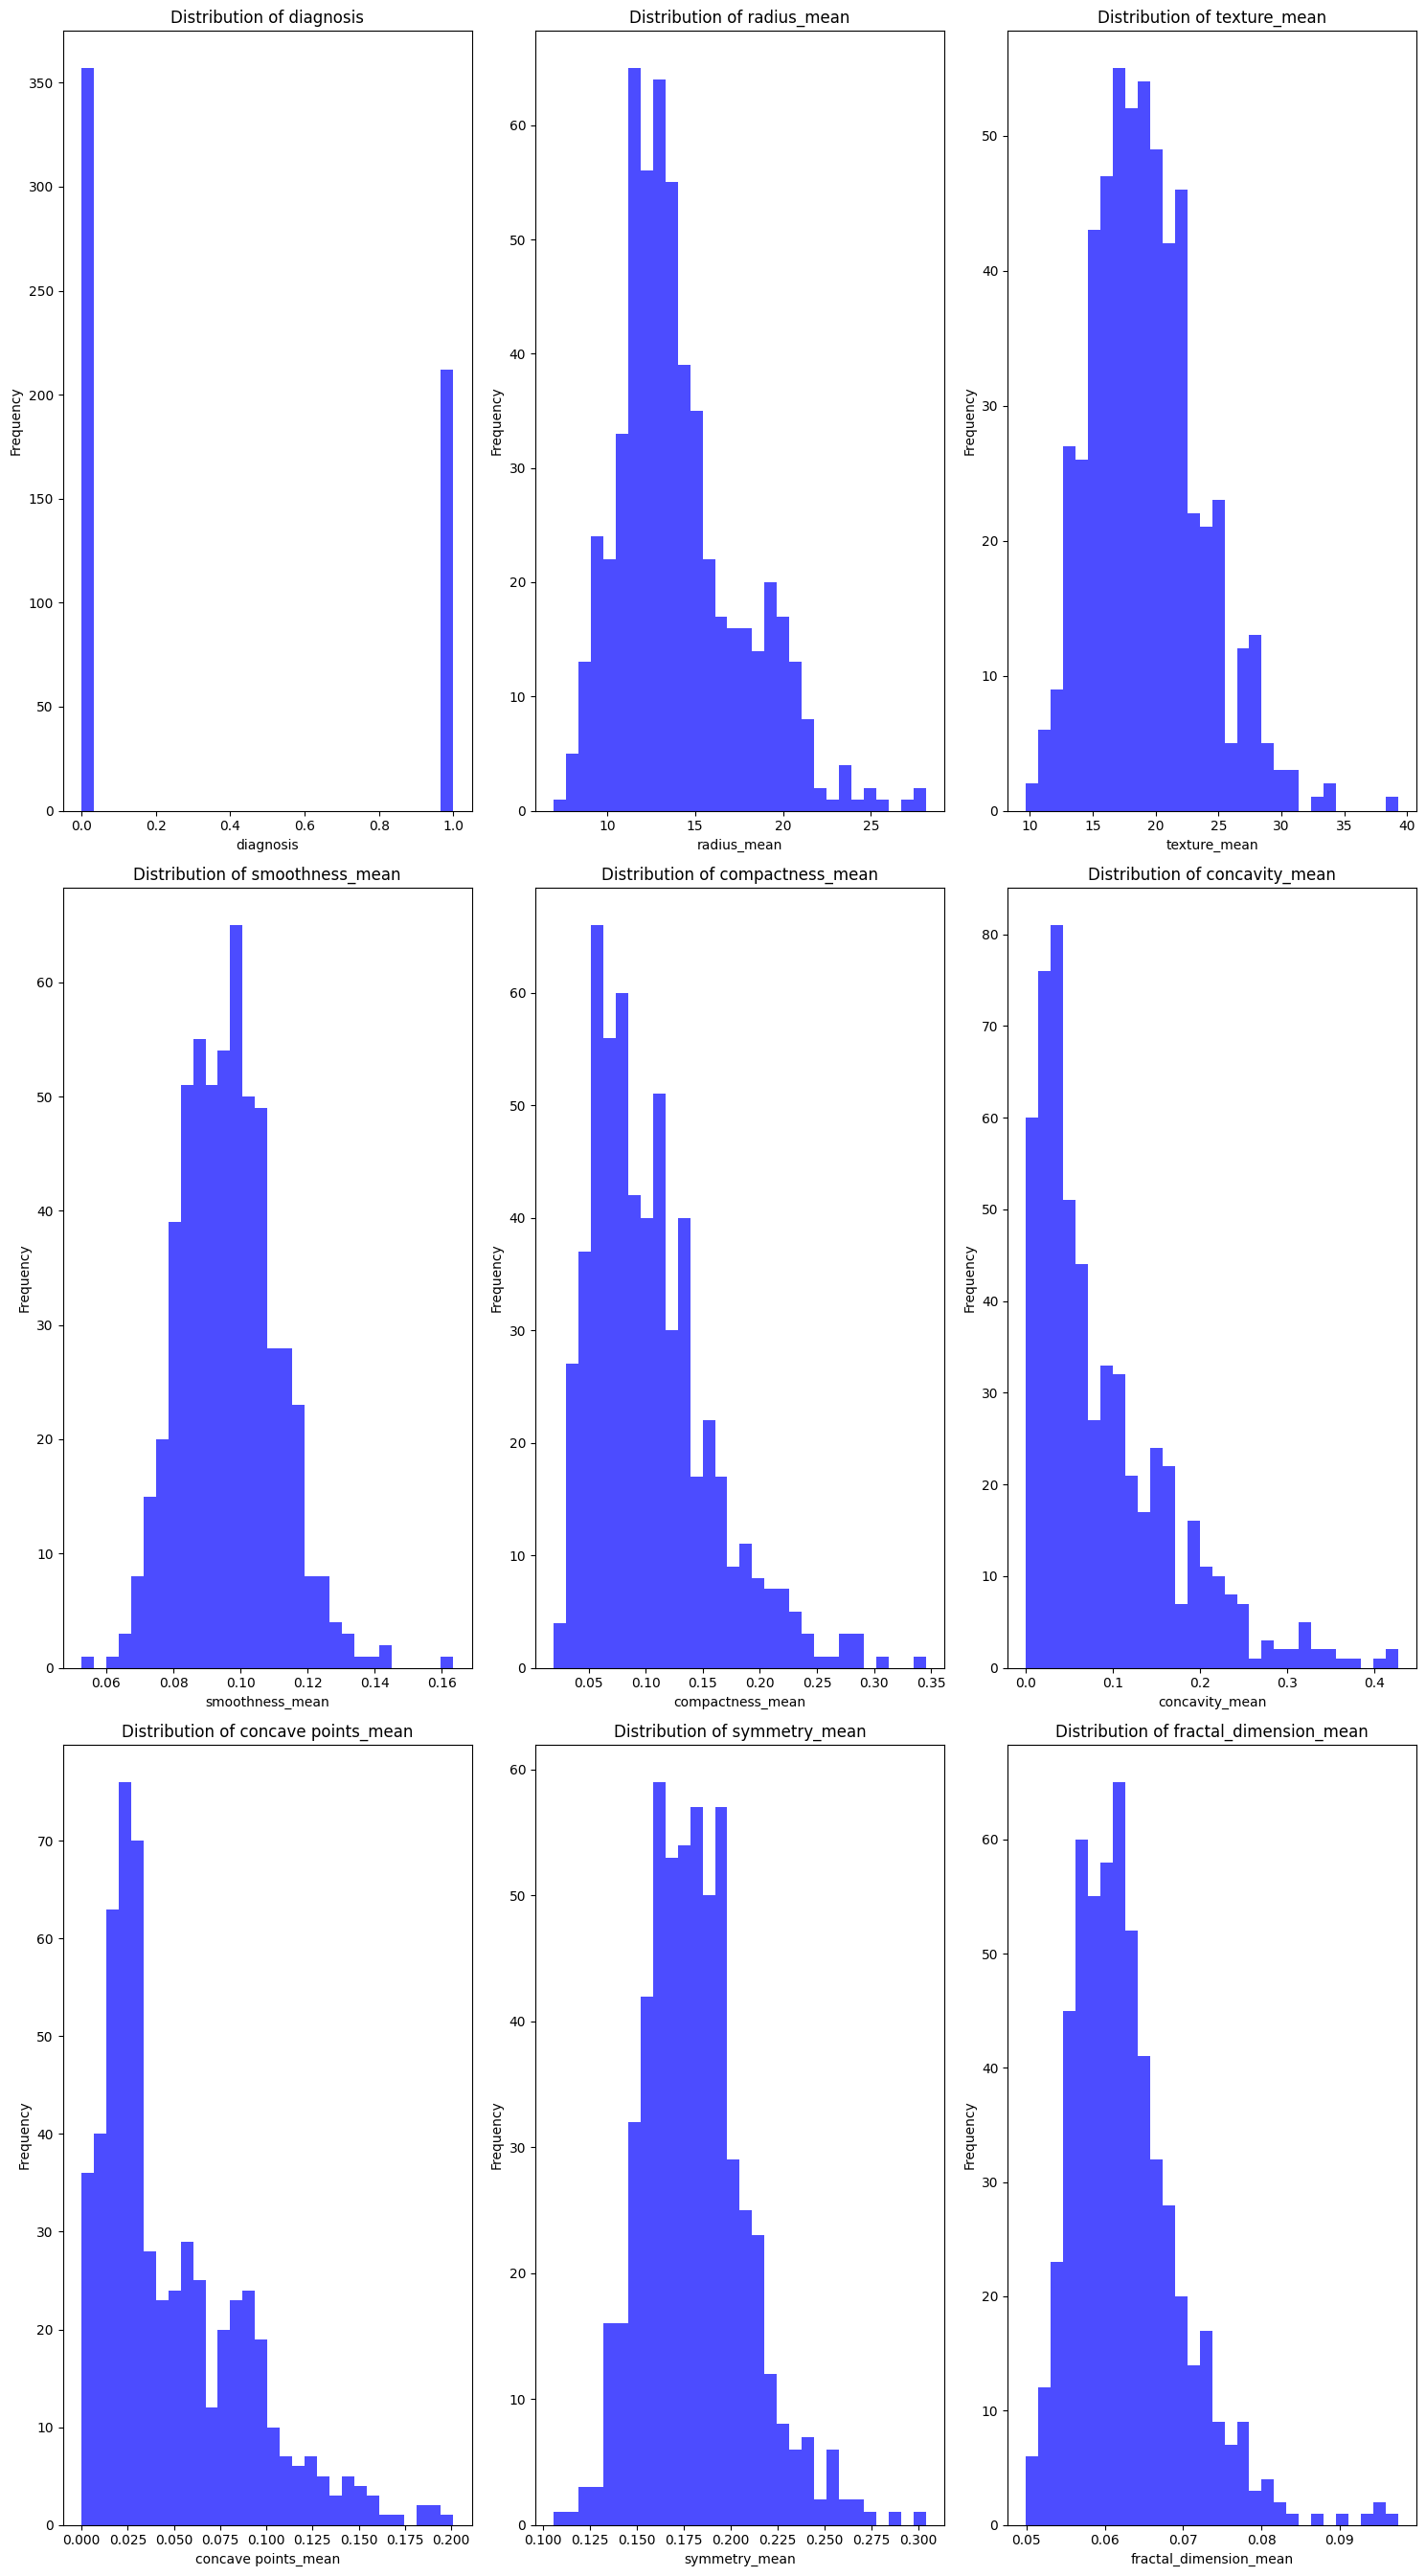

Skewness values:
radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
concavity_mean            1.401180
concave points_mean       1.171180
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
dtype: float64
Transforming 'radius_mean' (skewness=0.94)
 - Applied log-transform to 'radius_mean'
Transforming 'texture_mean' (skewness=0.65)
 - Applied log-transform to 'texture_mean'
Skipping 'smoothness_mean' (skewness=0.46)
Transforming 'compactness_mean' (skewness=1.19)
 - Applied log-transform to 'compactness_mean'
Transforming 'concavity_mean' (skewness=1.40)
 - Applied PowerTransformer to 'concavity_mean'
Transforming 'concave points_mean' (skewness=1.17)
 - Applied PowerTransformer to 'concave points_mean'
Transforming 'symmetry_mean' (skewness=0.73)
 - Applied log-transform to 'symmetry_mean'
Transforming 'fractal_dimension_mean' (skewness=1.30)
 - Applied log-transform to 'fractal_

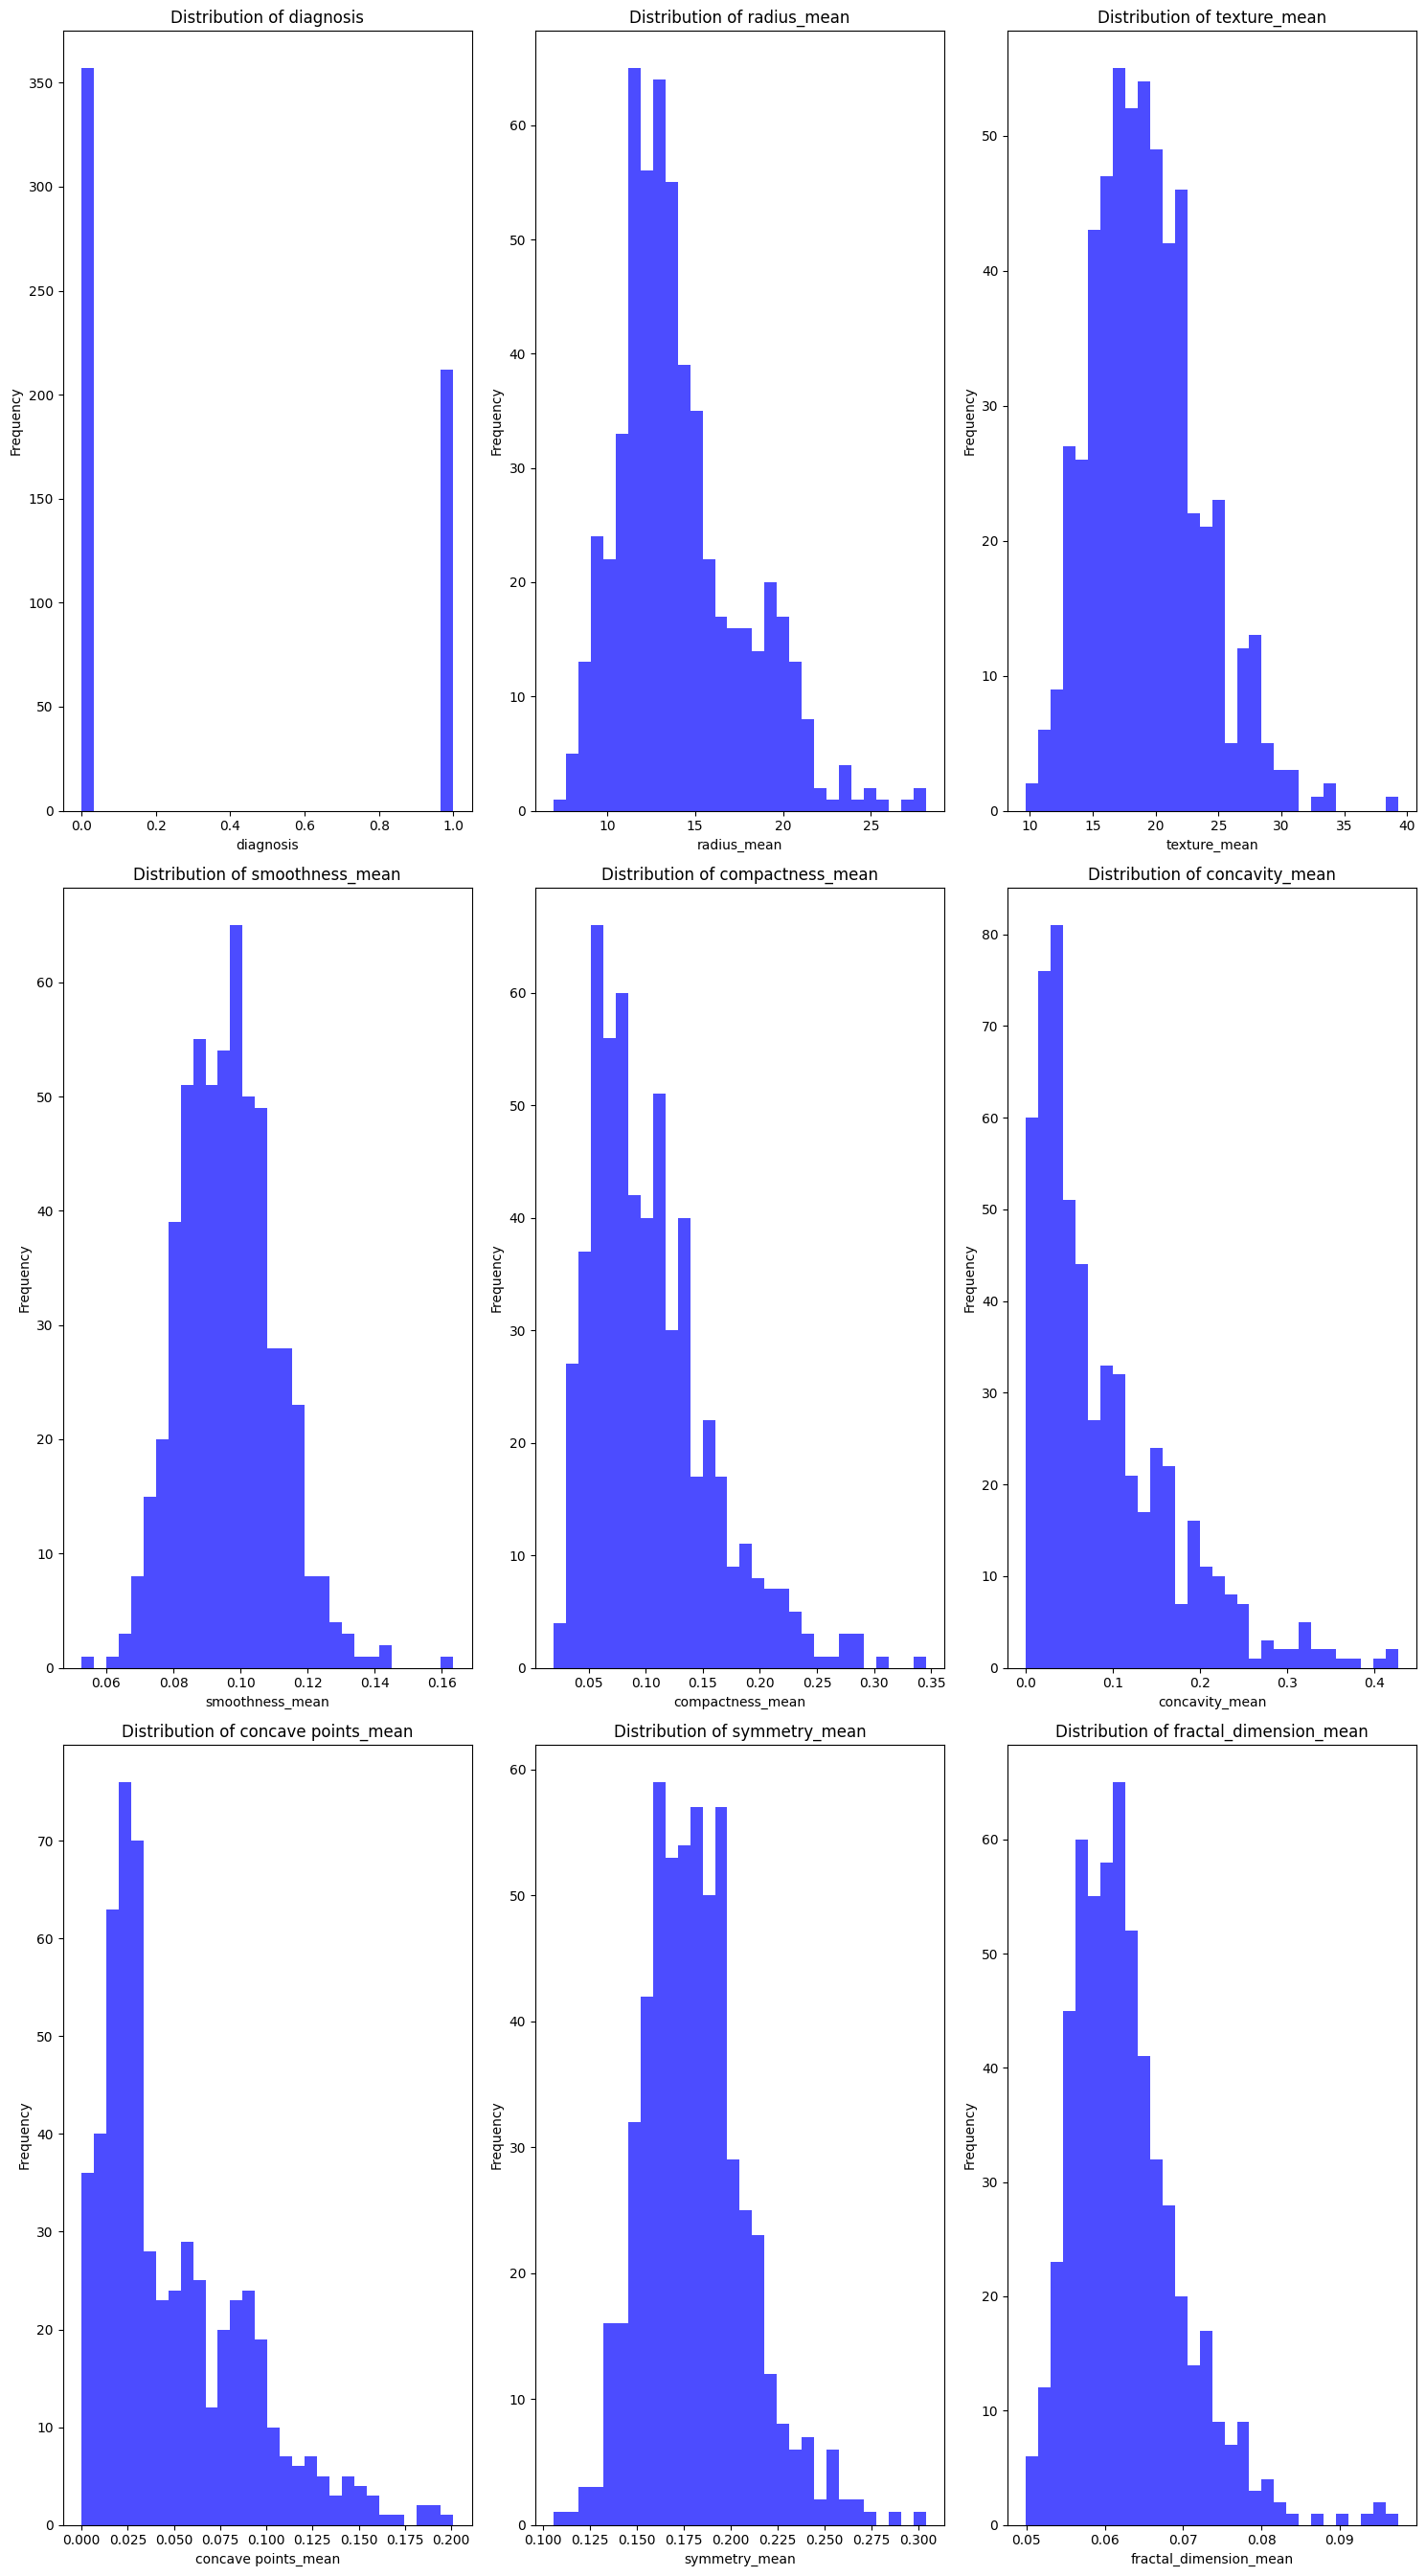

Skewness before: radius_mean               0.942380
texture_mean              0.650450
smoothness_mean           0.456324
compactness_mean          1.190123
concavity_mean            1.401180
concave points_mean       1.171180
symmetry_mean             0.725609
fractal_dimension_mean    1.304489
dtype: float64
Skewness after: radius_mean               0.348744
texture_mean              0.018733
smoothness_mean           0.456324
compactness_mean          1.043195
concavity_mean            0.223924
concave points_mean       0.198740
symmetry_mean             0.632718
fractal_dimension_mean    1.272294
dtype: float64


In [57]:
#Distributions
# Get numeric columns only (excluding your 'diagnosis' label if you want)
cols = df_pruned.columns

# Set up subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, len(cols) * 3))
axs = axs.flatten()  # Makes axs a 1D list of axes

for ax, col in zip(axs, cols):
    ax.hist(df_pruned[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Step 1: Calculate skewness for each feature except 'diagnosis'
features = df_pruned.drop(columns=['diagnosis'])
skewness = features.skew()

print("Skewness values:")
print(skewness)

# Step 2: Define threshold for "significant" skewness
threshold = 0.5

# Step 3: Create a copy to hold transformed data
df_transformed = df_pruned.copy()

# Step 4: Initialize PowerTransformer (Yeo-Johnson)
pt = PowerTransformer(method='yeo-johnson')

for col in features.columns:
    val_skew = skewness[col]
    if abs(val_skew) > threshold:
        print(f"Transforming '{col}' (skewness={val_skew:.2f})")
        
        # Check if strictly positive
        if (df_pruned[col] > 0).all():
            # Log-transform for strictly positive values
            df_transformed[col] = np.log1p(df_pruned[col])  # log1p to handle zeros safely
            print(f" - Applied log-transform to '{col}'")
        else:
            # Use PowerTransformer for zero or negative values
            reshaped = df_pruned[col].values.reshape(-1, 1)
            df_transformed[col] = pt.fit_transform(reshaped).flatten()
            print(f" - Applied PowerTransformer to '{col}'")
    else:
        print(f"Skipping '{col}' (skewness={val_skew:.2f})")

# Now df_transformed has the transformed features
# Set up subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, len(cols) * 3))
axs = axs.flatten()  # Makes axs a 1D list of axes

cols = df_transformed.columns

for ax, col in zip(axs, cols):
    ax.hist(df_pruned[col], bins=30, color='blue', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(f'{col}')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Skewness before:", df_pruned.drop(columns=['diagnosis']).skew())
print("Skewness after:", df_transformed.drop(columns=['diagnosis']).skew())

Scale data

In [ ]:
# Separate features (X) and label (y)
X = df_transformed.drop(columns=['diagnosis'])
y = df_transformed['diagnosis']

# Initialize RobustScaler
scaler = RobustScaler()

# Fit and transform the features
X_scaled_array = scaler.fit_transform(X)

# Convert the scaled NumPy array back to a DataFrame with the original column names
df_scaled = pd.concat([y, pd.DataFrame(X_scaled_array, columns=X.columns, index=X.index)], axis=1)

# Now df_scaled contains the scaled features as a DataFrame
print(df_scaled.head())


          diagnosis  radius_mean  texture_mean  smoothness_mean  \
id                                                                
842302            1     1.000661     -1.959975         1.190174   
842517            1     1.457938     -0.195490        -0.587956   
84300903          1     1.308422      0.404243         0.725304   
84348301          1    -0.523482      0.263599         2.463286   
84358402          1     1.411037     -0.907049         0.234020   

          compactness_mean  concavity_mean  concave points_mean  \
id                                                                
842302            2.620928        1.192848             1.242531   
842517           -0.215958        0.255468             0.628869   
84300903          1.001245        0.918787             1.143759   
84348301          2.703362        1.061224             0.988485   
84358402          0.605056        0.921058             0.981276   

          symmetry_mean  fractal_dimension_mean  
id        

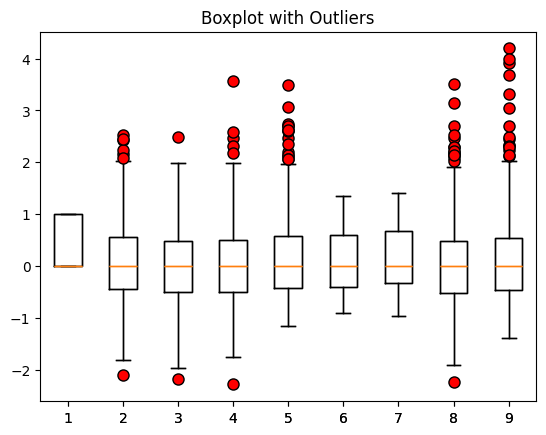

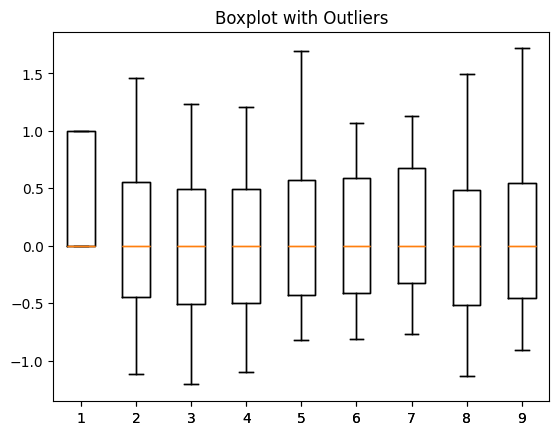

In [59]:
#Boxplot of outliers
plt.boxplot(df_scaled)
plt.title('Boxplot with Outliers')
plt.boxplot(df_scaled, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.show()

#Winsorize outliers
def winsorize_array(X, lower_percentile=5, upper_percentile=95):
    lower_cap = np.percentile(X, lower_percentile, axis=0)
    upper_cap = np.percentile(X, upper_percentile, axis=0)
    return np.clip(X, lower_cap, upper_cap)

to_winsorize = df_scaled.drop(columns=['diagnosis'])
winsorized_array = winsorize_array(to_winsorize.values, 5, 95)  # Use values for numpy operations
df_winsorized = pd.concat(
    [df_scaled['diagnosis'], 
     pd.DataFrame(winsorized_array, columns=to_winsorize.columns, index=to_winsorize.index)],
    axis=1
)

#Boxplot of outliers
plt.boxplot(df_winsorized)
plt.title('Boxplot with Outliers')
plt.boxplot(df_winsorized, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))
plt.show()


Prepare dataset for training and test

In [64]:
X = df_winsorized.drop('diagnosis', axis=1)
y = df_winsorized['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implement logistic regression and print the accuracy.

Intercept: [-1.83957144]
Coefficients: [[ 2.51218631  1.89558764  1.03853113 -0.66964283  2.03785132  2.0958089
   0.58990909 -0.34561542]]


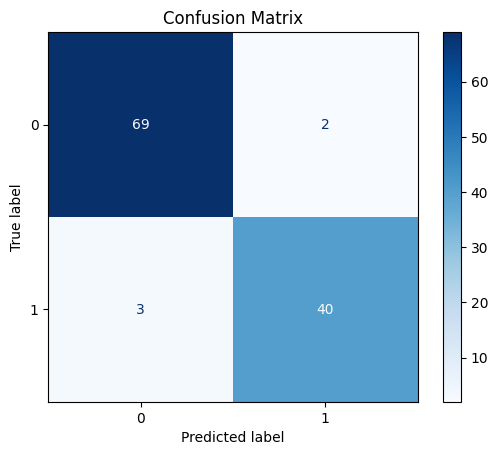

{'accuracy_log_reg': 0.956140350877193, 'precision_log_reg': 0.9523809523809523, 'recall_log_reg': 0.9302325581395349, 'f1_log_reg': 0.9411764705882353}


In [80]:
#Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#Evaluate its performance on the test set
#Accuracy
y_pred = log_reg.predict(X_test)
#Coefficients
print("Intercept:", log_reg.intercept_)
print("Coefficients:", log_reg.coef_)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Accuracy, Recall, Precision, F1-score and comment the results.
metrics_log_reg = {
    'accuracy_log_reg': accuracy_score(y_test, y_pred),
    'precision_log_reg': precision_score(y_test, y_pred),
    'recall_log_reg': recall_score(y_test, y_pred),
    'f1_log_reg': f1_score(y_test, y_pred)
}

print(metrics_log_reg)

Implement K Nearest Neighbours and print the accuracy.

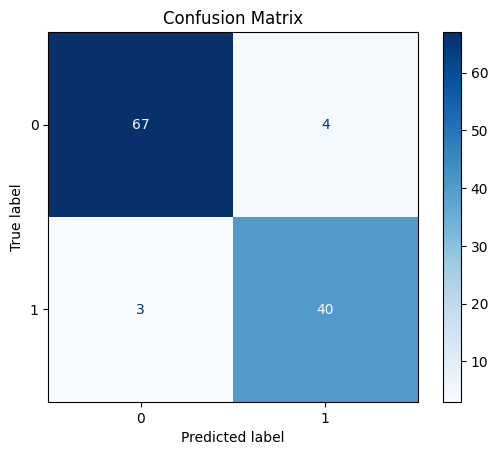

{'accuracy_knn': 0.9385964912280702, 'precision_knn': 0.9090909090909091, 'recall_knn': 0.9302325581395349, 'f1_knn': 0.9195402298850575}


In [81]:
#Train a K-Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#Evaluate its performance on the test set
y_pred = knn.predict(X_test)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Accuracy, Recall, Precision, F1-score and comment the results.
metrics_knn={
    'accuracy_knn': accuracy_score(y_test, y_pred),
    'precision_knn': precision_score(y_test, y_pred),
    'recall_knn': recall_score(y_test, y_pred),
    'f1_knn': f1_score(y_test, y_pred)
}

print(metrics_knn)

Implement Random Forests and print the accuracy.

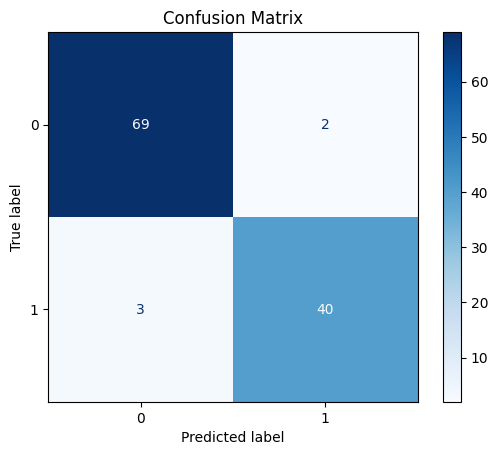

{'accuracy_rfc': 0.956140350877193, 'precision_rfc': 0.9523809523809523, 'recall_rfc': 0.9302325581395349, 'f1_rfc': 0.9411764705882353}


In [84]:
#Train a Random Foresr model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

#Evaluate its performance on the test set
y_pred = rfc.predict(X_test)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Accuracy, Recall, Precision, F1-score and comment the results.
metrics_rfc={
    'accuracy_rfc': accuracy_score(y_test, y_pred),
    'precision_rfc': precision_score(y_test, y_pred),
    'recall_rfc': recall_score(y_test, y_pred),
    'f1_rfc': f1_score(y_test, y_pred)
}

print(metrics_rfc)

Implement Support Vector Machines (SVM) and print the accuracy.

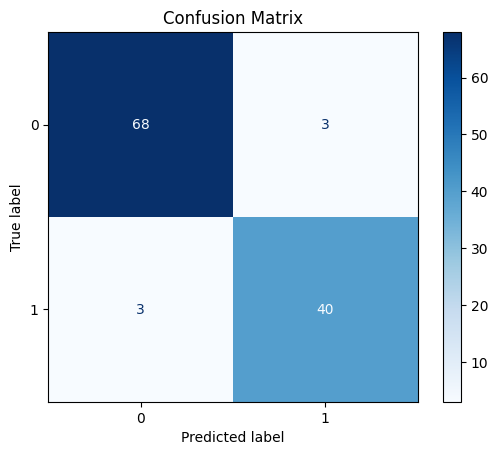

{'accuracy_svc': 0.9473684210526315, 'precision_svc': 0.9302325581395349, 'recall_svc': 0.9302325581395349, 'f1_svc': 0.9302325581395349}


In [88]:
#Train a Support Vector Machines (SVM) model
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)

#Evaluate its performance on the test set
y_pred = svc.predict(X_test)
#Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#Plot the Accuracy, Recall, Precision, F1-score and comment the results.
metrics_svc={
    'accuracy_svc': accuracy_score(y_test, y_pred),
    'precision_svc': precision_score(y_test, y_pred),
    'recall_svc': recall_score(y_test, y_pred),
    'f1_svc': f1_score(y_test, y_pred)
}

print(metrics_svc)

Which is the best model ?

In [ ]:
print(metrics_log_reg)
print(metrics_knn)
print(metrics_rfc)
print(metrics_svc)
#Tie between Logistic Regression and Random Forest

{'accuracy_log_reg': 0.956140350877193, 'precision_log_reg': 0.9523809523809523, 'recall_log_reg': 0.9302325581395349, 'f1_log_reg': 0.9411764705882353}
{'accuracy_knn': 0.9385964912280702, 'precision_knn': 0.9090909090909091, 'recall_knn': 0.9302325581395349, 'f1_knn': 0.9195402298850575}
{'accuracy_rfc': 0.956140350877193, 'precision_rfc': 0.9523809523809523, 'recall_rfc': 0.9302325581395349, 'f1_rfc': 0.9411764705882353}
{'accuracy_svc': 0.9473684210526315, 'precision_svc': 0.9302325581395349, 'recall_svc': 0.9302325581395349, 'f1_svc': 0.9302325581395349}
